# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
reg = smf.ols('tip ~ net_bill',data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           5.02e-23
Time:                        18:11:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

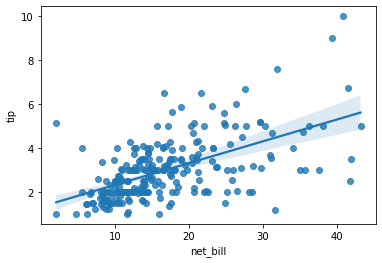

In [7]:
sns.regplot(x='net_bill',y='tip',data=tips)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [9]:
reg = smf.ols('tip ~ tip_pct',data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.00
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           0.000139
Time:                        18:14:50   Log-Likelihood:                -417.62
No. Observations:                 244   AIC:                             839.2
Df Residuals:                     242   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5848      0.137     18.842      0.000       2.315       2.855
tip_pct        2.0458      0.528      3.873      0.000       1.005       3.086
==============================================================================
Omnibus:                       83.846   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.899
Skew:                           1.498   Prob(JB):                     8.96e-55
Kurtosis:                       6.938   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tip_pct', ylabel='tip'>

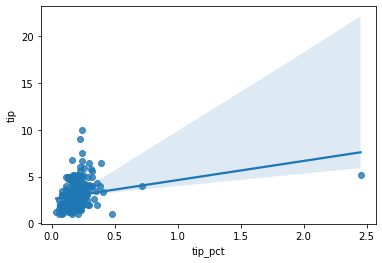

In [10]:
sns.regplot(x='tip_pct',y='tip',data=tips)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico está bem melhor representativo, podemos verificar isso no R² do reg.summary() entretando, o segundo gráfico a variável está em porcentagem, e como é a porcentagem em relação ao valor total faz com que os pontos do gráfico fiquem concentrados, não podendo comparar diretamente os R²s


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [17]:
tips ['pred_pct'] = reg.fittedvalues / (tips['total_bill']- reg.fittedvalues)

In [24]:
tips['pred_pct']

0      0.190116
1      0.404132
2      0.166166
3      0.140502
4      0.135629
         ...   
239    0.119934
240    0.112442
241    0.139925
242    0.187016
243    0.188135
Name: pred_pct, Length: 244, dtype: float64

In [26]:
reg_2 = smf.ols('tip ~ tip_pct*net_bill',data=tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.091e+31
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:37:36   Log-Likelihood:                 7838.8
No. Observations:                 244   AIC:                        -1.567e+04
Df Residuals:                     240   BIC:                        -1.566e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.829e-16   5.31e-16     -1.098      0.273   -1.63e-15    4.63e-16
tip_pct           2.442e-15   1.33e-15      1.841      0.067    -1.7e-16    5.06e-15
net_bill          1.856e-16    3.2e-17      5.792      0.000    1.22e-16    2.49e-16
tip_pct:net_bill     1.0000   1.83e-16   5.47e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       59.340   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.950
Skew:                          -1.338   Prob(JB):                     1.98e-22
Kurtosis:                       4.633   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
tips['pred_reg_2'] = reg_2.fittedvalues

In [31]:
tips[['pred_reg_2','tip']].corr().iloc[0,1]**2

1.0000000000000004

o R² desse está excelente , e muito melhor do que o do item 1